In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Import the Excel

In [45]:
# Load the dataset
original_df = pd.read_excel("IWA.xlsx", sheet_name='Final Raw Sample(0%)')

In [46]:
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14035 entries, 0 to 14034
Data columns (total 34 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Year                                                           14035 non-null  int64  
 1   Company Name                                                   14035 non-null  object 
 2   Country                                                        14014 non-null  object 
 3   GICS Sub-Industry                                              14035 non-null  object 
 4   Industry (Exiobase)                                            14035 non-null  object 
 5   Environmental Intensity (Sales)                                14035 non-null  float64
 6   Environmental Intensity (Op Inc)                               13273 non-null  float64
 7   Total Environmental Cost                                  

In [47]:
original_df.isna().sum()

Year                                                               0
Company Name                                                       0
Country                                                           21
GICS Sub-Industry                                                  0
Industry (Exiobase)                                                0
Environmental Intensity (Sales)                                    0
Environmental Intensity (Op Inc)                                 762
Total Environmental Cost                                           0
Working Capacity                                                   0
Fish Production Capacity                                           0
Crop Production Capacity                                           0
Meat Production Capacity                                           0
Biodiversity                                                       0
Abiotic Resources                                                  0
Water production capacity (Drinkin

for ppt sales

In [48]:
original_df = original_df.drop(original_df.loc[:,"Working Capacity":"Wood Production Capacity"], axis=1)

In [49]:
sales_df = original_df.drop(["Environmental Intensity (Op Inc)"], axis = 1)
sales_df.isna().sum()

Year                                0
Company Name                        0
Country                            21
GICS Sub-Industry                   0
Industry (Exiobase)                 0
Environmental Intensity (Sales)     0
Total Environmental Cost            0
SDG 1.5                             0
SDG 2.1                             0
SDG 2.2                             0
SDG 2.3                             0
SDG 2.4                             0
SDG 3.3                             0
SDG 3.4                             0
SDG 3.9                             0
SDG 6                               0
SDG 12.2                            0
SDG 14.1                            0
SDG 14.2                            0
SDG 14.3                            0
SDG 14.c                            0
SDG 15.1                            0
SDG 15.2                            0
SDG 15.5                            0
% Imputed                           0
dtype: int64

In [50]:
sales_df = sales_df.dropna()
sales_df["Revenue"] = sales_df["Total Environmental Cost"] / sales_df["Environmental Intensity (Sales)"]
sales_df["Environmental Intensity (Sales)"] = sales_df["Environmental Intensity (Sales)"] * 100
sales_df.drop("Year", axis=1).describe()

,Environmental Intensity (Sales),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,SDG 3.4,SDG 3.9,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
count,14014.000000,1.401400e+04,1.401400e+04,1.401400e+04,1.401400e+04,1.401400e+04,1.401400e+04,1.401400e+04,1.401400e+04,1.401400e+04,...,1.401400e+04,14014.000000,14014.000000,1.401400e+04,14014.000000,1.401400e+04,1.401400e+04,1.401400e+04,14014.000000,1.401400e+04
mean,-11.148374,-1.143108e+09,-4.371116e+08,-2.912455e+08,-2.909309e+08,-3.264161e+06,-3.265019e+06,-4.749453e+07,5.153830e+07,-1.567692e+06,...,-4.572272e+06,-4835.419265,-1925.057197,-1.376437e+05,-5747.449259,5.808804e+04,1.580760e+04,-4.153740e+04,0.065760,1.345256e+10
std,26.835906,4.910764e+09,1.857911e+09,1.167806e+09,1.166624e+09,1.389925e+07,1.389938e+07,1.897703e+08,5.476702e+08,3.331813e+07,...,1.002559e+08,24477.366724,15224.631295,5.478523e+05,29116.091177,3.552929e+05,2.276410e+06,1.747244e+05,0.067378,3.052269e+10
min,-199.278721,-1.144424e+11,-3.099678e+10,-1.901086e+10,-1.899585e+10,-2.310468e+08,-2.310468e+08,-3.109437e+09,-1.382928e+10,-1.372639e+09,...,-4.485891e+09,-483554.391700,-637843.776412,-9.017876e+06,-576362.772700,-3.991837e+06,-1.591757e+08,-2.907937e+06,0.000000,8.000000e+03
25%,-9.191929,-4.460648e+08,-1.738839e+08,-1.083346e+08,-1.081423e+08,-1.308355e+06,-1.308829e+06,-1.762322e+07,-6.988008e+04,-1.467122e+04,...,-9.087438e+04,-597.105996,-217.593023,-4.923306e+04,-711.708286,7.431207e+01,6.686102e+01,-1.638905e+04,0.011451,1.372682e+09
50%,-2.029146,-9.376374e+07,-3.615279e+07,-2.356746e+07,-2.354216e+07,-2.700198e+05,-2.701861e+05,-3.837487e+06,2.387389e+05,-1.591439e+03,...,-1.090699e+04,-89.639224,-29.433879,-1.072327e+04,-106.843641,7.335346e+02,7.050663e+02,-3.422732e+03,0.039468,4.144793e+09
75%,-0.688726,-2.047823e+07,-8.096575e+06,-5.391655e+06,-5.388226e+06,-6.033164e+04,-6.034635e+04,-8.810346e+05,3.544385e+06,-2.662390e+02,...,-1.866839e+03,-14.492877,-4.332599,-2.447595e+03,-17.274489,6.363741e+03,6.110518e+03,-7.645287e+02,0.103787,1.248531e+10
max,190.359635,5.211102e+10,2.282218e+10,1.325965e+10,1.325383e+10,1.695298e+08,1.695298e+08,2.136668e+09,8.662993e+09,0.000000e+00,...,0.000000e+00,189956.254000,0.005117,5.825526e+06,226412.474000,7.146112e+06,7.146112e+06,2.122135e+06,0.249796,6.740459e+11


# Check outliers in Sales

In [51]:
outlier_check = sales_df.loc[:,["Environmental Intensity (Sales)"]].abs()
outlier_check

,Environmental Intensity (Sales)
0,2.887178
1,1.677157
2,1.529690
3,1.462497
4,0.699273
...,...
14030,21.366866
14031,20.255585
14032,19.688286
14033,14.951467


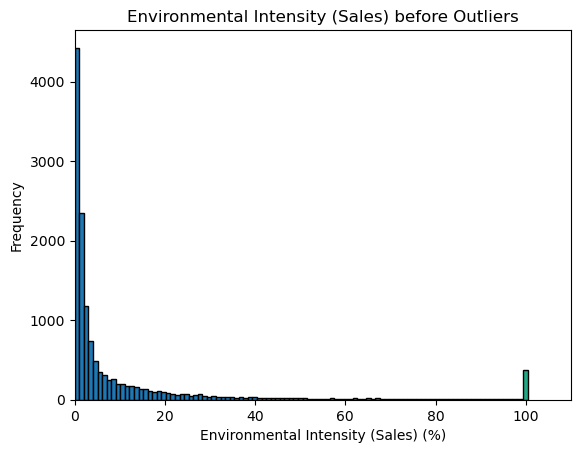

In [52]:
column_name = 'Environmental Intensity (Sales)'

threshold = 100

# Mask to determine values below and above threshold
below_threshold = outlier_check[column_name] <= threshold
above_threshold_count = len(outlier_check[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 99 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(outlier_check[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase to see the last bar clearly

# Display the plot
plt.title(f"{column_name} before Outliers")
plt.xlabel(f"{column_name} (%)")
plt.ylabel("Frequency")
plt.show()


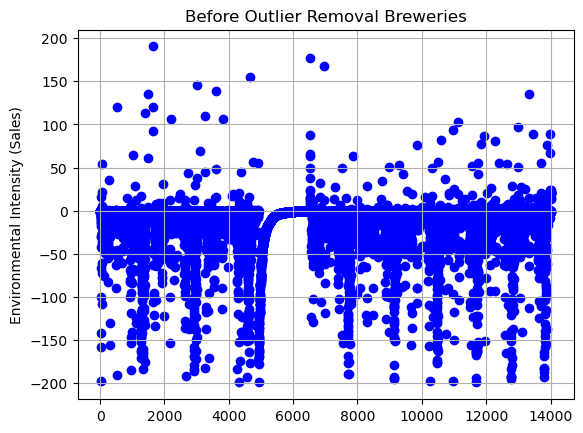

In [53]:
plt.scatter(range(len(sales_df)), sales_df["Environmental Intensity (Sales)"], color='blue')
plt.title("Before Outlier Removal Breweries")
plt.ylabel("Environmental Intensity (Sales)")
plt.grid(True)

# Show the plot
plt.show()

The reason it looks like this, is because the dataset is sorted by year and environmental intensity. The scatter plot is following a pattern by the year but it shouldnt have an effect on our analysis. 

## Remove the 99th percentile of values for Impact intensity on Sales

In [54]:
# Calculate the 0.5th and 99.5th percentile
pct_0_5 = np.percentile(sales_df['Environmental Intensity (Sales)'], 0.5)
pct_99_5 = np.percentile(sales_df['Environmental Intensity (Sales)'], 99.5)

# Remove the data points outside the 0.15th and 99.85th percentile
df_new_sales = sales_df[(sales_df['Environmental Intensity (Sales)'] >= pct_0_5) & (sales_df['Environmental Intensity (Sales)'] <= pct_99_5)].copy()
df_new_sales.drop("Year", axis=1).describe()

,Environmental Intensity (Sales),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,SDG 3.4,SDG 3.9,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
count,13872.000000,1.387200e+04,1.387200e+04,1.387200e+04,1.387200e+04,1.387200e+04,1.387200e+04,1.387200e+04,1.387200e+04,1.387200e+04,...,1.387200e+04,13872.000000,13872.000000,1.387200e+04,13872.000000,1.387200e+04,1.387200e+04,1.387200e+04,13872.000000,1.387200e+04
mean,-10.712811,-1.112963e+09,-4.240935e+08,-2.785720e+08,-2.782654e+08,-3.171177e+06,-3.172043e+06,-4.537193e+07,4.230200e+07,-1.571460e+06,...,-4.550135e+06,-4375.278652,-1839.424004,-1.302724e+05,-5198.829972,5.209685e+04,9.419246e+03,-4.016706e+04,0.066185,1.351032e+10
std,23.244694,4.636952e+09,1.738411e+09,1.103043e+09,1.101855e+09,1.300750e+07,1.300765e+07,1.793167e+08,4.969547e+08,3.348479e+07,...,1.006902e+08,22980.033849,14412.688492,5.152943e+05,27326.537983,3.333098e+05,2.284325e+06,1.640249e+05,0.067439,3.065990e+10
min,-162.929579,-1.144424e+11,-3.099678e+10,-1.901086e+10,-1.899585e+10,-2.310468e+08,-2.310468e+08,-3.109437e+09,-1.382928e+10,-1.372639e+09,...,-4.485891e+09,-483554.391700,-637843.776412,-9.017876e+06,-576362.772700,-3.991837e+06,-1.591757e+08,-2.907937e+06,0.000000,8.000000e+03
25%,-8.991767,-4.398306e+08,-1.703499e+08,-1.046678e+08,-1.045760e+08,-1.280571e+06,-1.281873e+06,-1.698086e+07,-7.654596e+04,-1.428011e+04,...,-8.817924e+04,-568.964411,-212.630714,-4.732321e+04,-678.165499,7.238991e+01,6.603848e+01,-1.607736e+04,0.011739,1.369876e+09
50%,-2.029146,-9.376374e+07,-3.608235e+07,-2.316304e+07,-2.313659e+07,-2.694716e+05,-2.696542e+05,-3.759249e+06,2.317211e+05,-1.576451e+03,...,-1.079269e+04,-87.445760,-28.742080,-1.052034e+04,-104.229186,7.171775e+02,6.869744e+02,-3.416658e+03,0.039892,4.144793e+09
75%,-0.696958,-2.081014e+07,-8.151723e+06,-5.362619e+06,-5.345549e+06,-6.086049e+04,-6.093166e+04,-8.723592e+05,3.353371e+06,-2.640782e+02,...,-1.853411e+03,-14.277032,-4.281878,-2.428027e+03,-17.017216,6.018235e+03,5.778345e+03,-7.741711e+02,0.104396,1.250517e+10
max,24.494820,2.070037e+10,8.159437e+09,6.368344e+09,6.364899e+09,5.996862e+07,5.996862e+07,1.052732e+09,8.662993e+09,0.000000e+00,...,0.000000e+00,189956.254000,0.005117,3.236546e+06,226412.474000,7.146112e+06,7.146112e+06,7.833655e+05,0.249715,6.740459e+11


In [55]:
outlier_check = df_new_sales.loc[:,["Environmental Intensity (Sales)"]].abs()
outlier_check

,Environmental Intensity (Sales)
0,2.887178
1,1.677157
2,1.529690
3,1.462497
4,0.699273
...,...
14030,21.366866
14031,20.255585
14032,19.688286
14033,14.951467


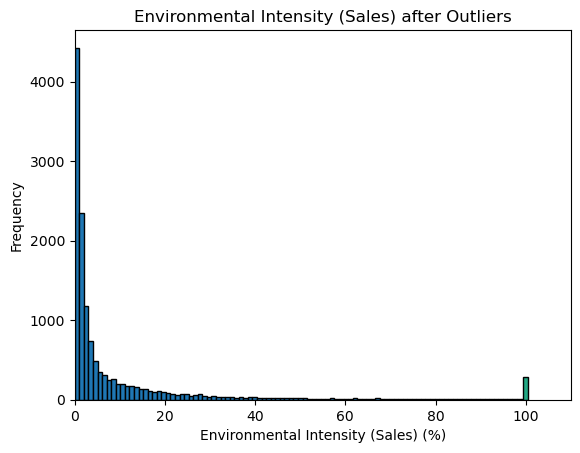

In [56]:
column_name = 'Environmental Intensity (Sales)'

threshold = 100

# Mask to determine values below and above threshold
below_threshold = outlier_check[column_name] <= threshold
above_threshold_count = len(outlier_check[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 99 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(outlier_check[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title(f"{column_name} after Outliers")
plt.xlabel(f"{column_name} (%)")
plt.ylabel("Frequency")
plt.show()


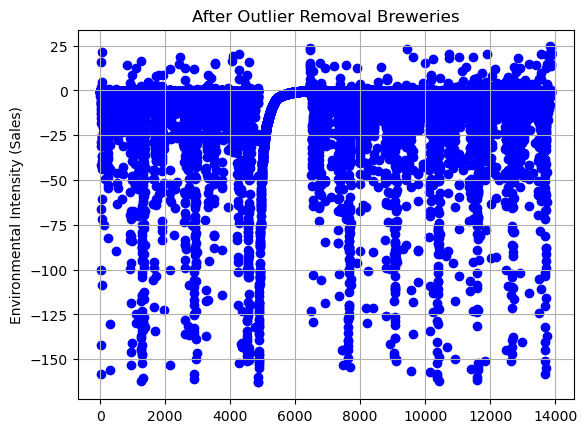

In [57]:
plt.scatter(range(len(df_new_sales)), df_new_sales["Environmental Intensity (Sales)"], color='blue')
plt.title("After Outlier Removal Breweries")
plt.ylabel("Environmental Intensity (Sales)")
plt.grid(True)

# Show the plot
plt.show()

### Export

In [58]:
df_new_sales.to_csv("Sales_no_outliers.csv")

In [59]:
df_rev = df_new_sales.copy()
for column in df_rev.loc[:,"SDG 1.5":"SDG 15.5"]:
    #print(column)
    df_rev[column] = (df_rev[column] / df_rev['Revenue'])*100
df_rev.to_csv("Sales_no_outliers_percentage.csv")

# Checking outliers in Op Inc

In [60]:
# Load the dataset
opinc_df = original_df.copy()

In [61]:
opinc_df.isna().sum()

Year                                  0
Company Name                          0
Country                              21
GICS Sub-Industry                     0
Industry (Exiobase)                   0
Environmental Intensity (Sales)       0
Environmental Intensity (Op Inc)    762
Total Environmental Cost              0
SDG 1.5                               0
SDG 2.1                               0
SDG 2.2                               0
SDG 2.3                               0
SDG 2.4                               0
SDG 3.3                               0
SDG 3.4                               0
SDG 3.9                               0
SDG 6                                 0
SDG 12.2                              0
SDG 14.1                              0
SDG 14.2                              0
SDG 14.3                              0
SDG 14.c                              0
SDG 15.1                              0
SDG 15.2                              0
SDG 15.5                              0


In [62]:
opinc_df = opinc_df.dropna()
opinc_df["Environmental Intensity (Op Inc)"] = opinc_df["Environmental Intensity (Op Inc)"] * 100

for ppt op inc

In [63]:
opinc_df.drop(["Year", "Environmental Intensity (Sales)"], axis=1).describe()

,Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,SDG 3.4,SDG 3.9,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
count,13255.000000,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,1.325500e+04,13255.000000,13255.000000,1.325500e+04,13255.000000,1.325500e+04,1.325500e+04,1.325500e+04,13255.000000
mean,-203.455216,-1.127009e+09,-4.282642e+08,-2.864684e+08,-2.861529e+08,-3.198494e+06,-3.199395e+06,-4.673020e+07,5.339021e+07,-1.640463e+06,-1.198481e+08,-4.780801e+06,-4814.623217,-1853.794943,-1.357714e+05,-5721.743941,5.843617e+04,1.381861e+04,-4.073476e+04,0.065964
std,2488.450225,4.811956e+09,1.806133e+09,1.141761e+09,1.140555e+09,1.352070e+07,1.352085e+07,1.856459e+08,5.435516e+08,3.423578e+07,1.363792e+09,1.030700e+08,24678.366236,14456.663131,5.381061e+05,29352.770698,3.575647e+05,2.339473e+06,1.699492e+05,0.067471
min,-246289.416837,-1.144424e+11,-3.099678e+10,-1.901086e+10,-1.899585e+10,-2.310468e+08,-2.310468e+08,-3.109437e+09,-1.382928e+10,-1.372639e+09,-7.691509e+10,-4.485891e+09,-483554.391700,-637843.776412,-9.017876e+06,-576362.772700,-3.991837e+06,-1.591757e+08,-2.907937e+06,0.000000
25%,-91.596196,-4.488437e+08,-1.754897e+08,-1.095732e+08,-1.094354e+08,-1.321089e+06,-1.321647e+06,-1.778650e+07,-7.655591e+04,-1.487693e+04,-2.063631e+07,-9.148126e+04,-602.118303,-220.498018,-4.952169e+04,-717.682603,7.854620e+01,6.965077e+01,-1.657232e+04,0.011382
50%,-21.550120,-9.553410e+07,-3.696838e+07,-2.384376e+07,-2.380392e+07,-2.756411e+05,-2.757690e+05,-3.878464e+06,2.468594e+05,-1.620120e+03,-2.718530e+06,-1.132753e+04,-91.267921,-30.194350,-1.083142e+04,-108.784933,7.529707e+02,7.171479e+02,-3.499918e+03,0.039636
75%,-5.624209,-2.121046e+07,-8.330952e+06,-5.582211e+06,-5.576480e+06,-6.227189e+04,-6.231071e+04,-9.133677e+05,3.581245e+06,-2.727118e+02,-3.004138e+05,-1.929421e+03,-14.909830,-4.469561,-2.531129e+03,-17.771467,6.470874e+03,6.261595e+03,-7.919335e+02,0.104491
max,7994.514465,5.211102e+10,2.282218e+10,1.325965e+10,1.325383e+10,1.695298e+08,1.695298e+08,2.136668e+09,8.662993e+09,0.000000e+00,2.093348e+10,0.000000e+00,189956.254000,0.005117,5.825526e+06,226412.474000,7.146112e+06,7.146112e+06,2.122135e+06,0.249796


In [64]:
outlier_check = opinc_df.loc[:,["Environmental Intensity (Op Inc)"]].abs()
outlier_check

,Environmental Intensity (Op Inc)
0,13.025357
1,3.465639
2,9.487849
4,5.095678
5,7.274924
...,...
14030,1101.472959
14031,661.890040
14032,1104.701635
14033,7994.514465


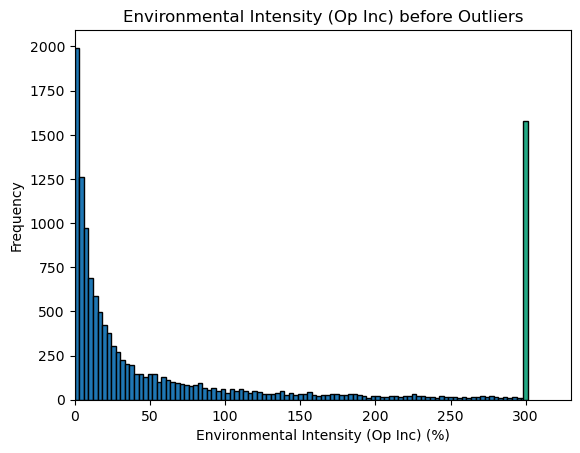

In [65]:
column_name = 'Environmental Intensity (Op Inc)'

threshold = 300

# Mask to determine values below and above threshold
below_threshold = outlier_check[column_name] <= threshold
above_threshold_count = len(outlier_check[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 99 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(outlier_check[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title(f"{column_name} before Outliers")
plt.xlabel(f"{column_name} (%)")
plt.ylabel("Frequency")
plt.show()


In [66]:
# Calculate the 0.5th and 99.5th percentile
pct_0_05 = np.percentile(opinc_df['Environmental Intensity (Op Inc)'], 0.5)
pct_99_5 = np.percentile(opinc_df['Environmental Intensity (Op Inc)'], 99.5)

# Remove the data points outside the 0.15th and 99.85th percentile
df_new_opinc = opinc_df[(opinc_df['Environmental Intensity (Op Inc)'] >= pct_0_05) & (opinc_df['Environmental Intensity (Op Inc)'] <= pct_99_5)].copy()
df_new_opinc.drop(["Year", "Environmental Intensity (Sales)"], axis=1).describe()

,Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,SDG 3.4,SDG 3.9,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
count,13121.000000,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,13121.000000,13121.000000,1.312100e+04,13121.000000,1.312100e+04,1.312100e+04,1.312100e+04,13121.000000
mean,-134.772372,-1.125272e+09,-4.266590e+08,-2.813422e+08,-2.810325e+08,-3.189129e+06,-3.190029e+06,-4.583843e+07,4.681335e+07,-1.308766e+06,-1.256669e+08,-3.736171e+06,-4405.310702,-1713.690352,-1.320298e+05,-5233.696964,5.353295e+04,8.520640e+03,-4.045246e+04,0.066155
std,350.055684,4.499852e+09,1.673336e+09,1.071211e+09,1.069999e+09,1.253112e+07,1.253128e+07,1.742830e+08,4.836359e+08,2.941261e+07,1.313414e+09,8.715993e+07,22493.963852,13269.510988,5.035275e+05,26742.071909,3.256415e+05,2.346377e+06,1.579383e+05,0.067446
min,-3959.926411,-1.144424e+11,-3.099678e+10,-1.901086e+10,-1.899585e+10,-2.310468e+08,-2.310468e+08,-3.109437e+09,-1.382928e+10,-1.372639e+09,-7.691509e+10,-4.485891e+09,-438614.411850,-637843.776412,-9.017876e+06,-522797.482350,-3.991837e+06,-1.591757e+08,-2.907937e+06,0.000000
25%,-89.873592,-4.458737e+08,-1.739558e+08,-1.066676e+08,-1.065838e+08,-1.308908e+06,-1.309841e+06,-1.729992e+07,-7.613815e+04,-1.434994e+04,-2.037126e+07,-8.806982e+04,-575.220136,-213.223306,-4.820457e+04,-685.621883,7.790931e+01,6.961081e+01,-1.640019e+04,0.011513
50%,-21.550120,-9.574073e+07,-3.699585e+07,-2.356619e+07,-2.354133e+07,-2.758020e+05,-2.759722e+05,-3.822905e+06,2.426662e+05,-1.596068e+03,-2.720801e+06,-1.107407e+04,-89.365750,-29.609041,-1.063769e+04,-106.517679,7.329948e+02,7.055501e+02,-3.501970e+03,0.039834
75%,-5.703649,-2.171530e+07,-8.480420e+06,-5.560017e+06,-5.547931e+06,-6.343938e+04,-6.344985e+04,-9.070517e+05,3.445401e+06,-2.714495e+02,-3.059681e+05,-1.916803e+03,-14.804494,-4.415304,-2.513744e+03,-17.645914,6.190151e+03,5.951383e+03,-8.062083e+02,0.104716
max,266.812925,2.070037e+10,9.060357e+09,6.368344e+09,6.364899e+09,7.521581e+07,7.521152e+07,1.052732e+09,8.270737e+09,0.000000e+00,3.972227e+09,0.000000e+00,174734.732000,0.004864,3.236546e+06,208271.492000,6.481907e+06,6.481907e+06,7.833655e+05,0.249715


In [67]:
outlier_check = df_new_opinc.loc[:,["Environmental Intensity (Op Inc)"]].abs()
outlier_check

,Environmental Intensity (Op Inc)
0,13.025357
1,3.465639
2,9.487849
4,5.095678
5,7.274924
...,...
14023,14.650443
14024,2.264613
14025,266.812925
14032,1104.701635


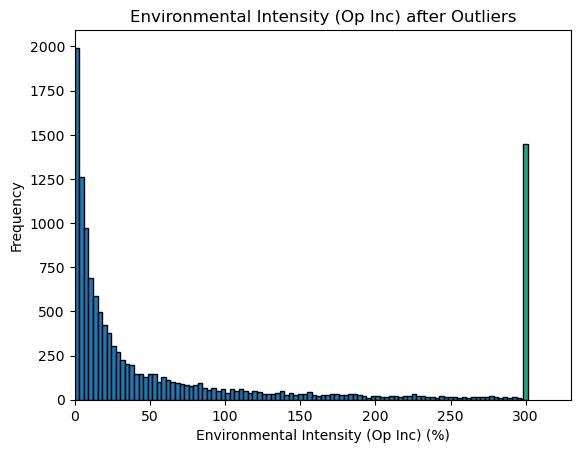

In [68]:
column_name = 'Environmental Intensity (Op Inc)'

threshold = 300

# Mask to determine values below and above threshold
below_threshold = outlier_check[column_name] <= threshold
above_threshold_count = len(outlier_check[column_name][~below_threshold])

# Create bins up to the threshold
bins = np.linspace(0, threshold, 100)  # 99 bins up to the threshold

# Plot histogram with custom bins
n, bins, patches = plt.hist(outlier_check[column_name][below_threshold].dropna(), bins=bins, edgecolor='k')

# Manually add a bar for values above the threshold
plt.bar(threshold, above_threshold_count, width=(threshold - bins[-2]), color=plt.cm.viridis(0.6), edgecolor='k')

# Set x-axis limit
plt.xlim(0, 1.1*threshold)  # Increase a bit to see the last bar clearly

# Display the plot
plt.title(f"{column_name} after Outliers")
plt.xlabel(f"{column_name} (%)")
plt.ylabel("Frequency")
plt.show()


### Export Op Income

In [69]:
df_new_opinc.to_csv("Opinc_no_outliers.csv")

In [70]:
df_new_opinc.describe()

,Year,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,...,SDG 6,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed
count,13121.000000,13121.000000,13121.000000,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,1.312100e+04,...,1.312100e+04,1.312100e+04,13121.000000,13121.000000,1.312100e+04,13121.000000,1.312100e+04,1.312100e+04,1.312100e+04,13121.000000
mean,2014.973478,-0.109560,-134.772372,-1.125272e+09,-4.266590e+08,-2.813422e+08,-2.810325e+08,-3.189129e+06,-3.190029e+06,-4.583843e+07,...,-1.256669e+08,-3.736171e+06,-4405.310702,-1713.690352,-1.320298e+05,-5233.696964,5.353295e+04,8.520640e+03,-4.045246e+04,0.066155
std,2.790155,0.252526,350.055684,4.499852e+09,1.673336e+09,1.071211e+09,1.069999e+09,1.253112e+07,1.253128e+07,1.742830e+08,...,1.313414e+09,8.715993e+07,22493.963852,13269.510988,5.035275e+05,26742.071909,3.256415e+05,2.346377e+06,1.579383e+05,0.067446
min,2010.000000,-1.992787,-3959.926411,-1.144424e+11,-3.099678e+10,-1.901086e+10,-1.899585e+10,-2.310468e+08,-2.310468e+08,-3.109437e+09,...,-7.691509e+10,-4.485891e+09,-438614.411850,-637843.776412,-9.017876e+06,-522797.482350,-3.991837e+06,-1.591757e+08,-2.907937e+06,0.000000
25%,2013.000000,-0.087008,-89.873592,-4.458737e+08,-1.739558e+08,-1.066676e+08,-1.065838e+08,-1.308908e+06,-1.309841e+06,-1.729992e+07,...,-2.037126e+07,-8.806982e+04,-575.220136,-213.223306,-4.820457e+04,-685.621883,7.790931e+01,6.961081e+01,-1.640019e+04,0.011513
50%,2015.000000,-0.019934,-21.550120,-9.574073e+07,-3.699585e+07,-2.356619e+07,-2.354133e+07,-2.758020e+05,-2.759722e+05,-3.822905e+06,...,-2.720801e+06,-1.107407e+04,-89.365750,-29.609041,-1.063769e+04,-106.517679,7.329948e+02,7.055501e+02,-3.501970e+03,0.039834
75%,2017.000000,-0.006939,-5.703649,-2.171530e+07,-8.480420e+06,-5.560017e+06,-5.547931e+06,-6.343938e+04,-6.344985e+04,-9.070517e+05,...,-3.059681e+05,-1.916803e+03,-14.804494,-4.415304,-2.513744e+03,-17.645914,6.190151e+03,5.951383e+03,-8.062083e+02,0.104716
max,2019.000000,1.134466,266.812925,2.070037e+10,9.060357e+09,6.368344e+09,6.364899e+09,7.521581e+07,7.521152e+07,1.052732e+09,...,3.972227e+09,0.000000e+00,174734.732000,0.004864,3.236546e+06,208271.492000,6.481907e+06,6.481907e+06,7.833655e+05,0.249715


# Filter for only the Brewery Category

In [71]:
# Load the dataset
brewery_df = original_df[original_df['GICS Sub-Industry'] == 'Brewers'].copy()

we see no NA's in the Brewers Category

In [72]:
brewery_df.isna().sum()

Year                                0
Company Name                        0
Country                             0
GICS Sub-Industry                   0
Industry (Exiobase)                 0
Environmental Intensity (Sales)     0
Environmental Intensity (Op Inc)    0
Total Environmental Cost            0
SDG 1.5                             0
SDG 2.1                             0
SDG 2.2                             0
SDG 2.3                             0
SDG 2.4                             0
SDG 3.3                             0
SDG 3.4                             0
SDG 3.9                             0
SDG 6                               0
SDG 12.2                            0
SDG 14.1                            0
SDG 14.2                            0
SDG 14.3                            0
SDG 14.c                            0
SDG 15.1                            0
SDG 15.2                            0
SDG 15.5                            0
% Imputed                           0
dtype: int64

In [73]:
brewery_df["Revenue"] = brewery_df["Total Environmental Cost"] / brewery_df["Environmental Intensity (Sales)"]
brewery_df.loc[:,"Environmental Intensity (Op Inc)"] = brewery_df.loc[:,"Environmental Intensity (Op Inc)"] * 100
brewery_df.loc[:,"Environmental Intensity (Sales)"] = brewery_df.loc[:,"Environmental Intensity (Sales)"] * 100
brewery_df.drop("Year", axis=1).describe()

,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,SDG 3.4,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
count,97.000000,97.000000,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,9.700000e+01,...,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,97.000000,9.700000e+01
mean,-4.511784,-77.038261,-4.739359e+08,-1.734047e+08,-1.086084e+08,-1.085031e+08,-1.296010e+06,-1.296302e+06,-1.761760e+07,1.389104e+07,...,-126737.343390,-1067.378026,-226.408236,-49229.743204,-1272.239419,14262.081583,11394.776171,-16245.525447,0.053349,1.599170e+10
std,7.738563,290.389603,4.565047e+08,1.869971e+08,1.136731e+08,1.135265e+08,1.407018e+06,1.406877e+06,1.838770e+07,1.992999e+07,...,117967.725419,1008.590093,284.392753,50532.923593,1202.168344,15314.093566,21682.138626,17397.521030,0.050661,1.140813e+10
min,-57.509600,-2156.038950,-2.014783e+09,-8.152604e+08,-4.966729e+08,-4.960072e+08,-6.138997e+06,-6.139185e+06,-8.033947e+07,-3.922932e+07,...,-432104.047468,-3914.291085,-1760.270030,-220370.587233,-4665.559245,-9527.183447,-63221.871316,-75893.622336,0.000854,2.061860e+08
25%,-4.342471,-35.691971,-5.325855e+08,-1.984082e+08,-1.243702e+08,-1.242491e+08,-1.484814e+06,-1.484814e+06,-2.017543e+07,2.062777e+06,...,-169257.315878,-1634.749760,-287.744785,-55954.671146,-1948.506560,2331.455963,2331.455963,-18479.781729,0.010532,4.885000e+09
50%,-2.414563,-19.566298,-3.077938e+08,-1.236924e+08,-7.752953e+07,-7.748200e+07,-9.220031e+05,-9.220031e+05,-1.271185e+07,7.345311e+06,...,-80676.306954,-568.200650,-140.119558,-36352.598366,-677.255150,7657.845811,7657.845811,-11508.130189,0.029563,1.489021e+10
75%,-1.898778,-16.054846,-2.053146e+08,-5.144656e+07,-3.004046e+07,-3.002671e+07,-3.822476e+05,-3.822476e+05,-4.843017e+06,2.515429e+07,...,-27982.157190,-208.514000,-98.703951,-13210.562858,-248.534000,21553.054908,21436.900812,-4784.980253,0.085090,2.330599e+10
max,-1.065933,-5.786155,-5.663652e+07,-1.363524e+07,-9.517304e+06,-9.505234e+06,-1.033039e+05,-1.033039e+05,-1.533179e+06,6.179646e+07,...,-1511.826537,-21.695746,-6.372799,-4469.580254,-25.859801,56659.806086,56659.806086,-1607.746022,0.220991,5.248464e+10


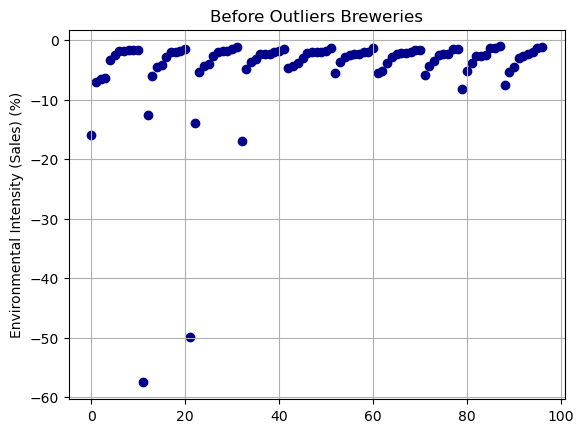

In [74]:
plt.scatter(range(len(brewery_df)), brewery_df["Environmental Intensity (Sales)"], color='darkblue')
plt.title("Before Outliers Breweries")
plt.ylabel("Environmental Intensity (Sales) (%)")
plt.grid(True)

# Show the plot
plt.show()

remove the culprits in the brewers

In [75]:
brewery_df = brewery_df[brewery_df['Company Name'] != 'CHINA RESOURCES BEER (HLDGS)']
brewery_df = brewery_df[brewery_df['Company Name'] != 'CRAFT BREW ALLIANCE INC']
brewery_df.drop("Year", axis=1).describe()

,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,SDG 3.4,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
count,91.000000,91.000000,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,9.100000e+01,...,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,91.000000,9.100000e+01
mean,-2.977443,-25.331055,-4.696398e+08,-1.775089e+08,-1.113835e+08,-1.112734e+08,-1.327041e+06,-1.327352e+06,-1.807047e+07,1.452140e+07,...,-134315.159861,-1121.729405,-240.238970,-50527.037097,-1337.022435,14972.608048,11916.249532,-16633.767034,0.056647,1.681702e+10
std,1.612351,15.212808,4.645242e+08,1.920374e+08,1.166299e+08,1.164796e+08,1.444969e+06,1.444816e+06,1.886434e+07,2.040378e+07,...,117906.380316,1017.058274,288.341375,51819.900145,1212.261820,15537.123607,22282.490880,17863.949859,0.050587,1.128396e+10
min,-8.143234,-72.614319,-2.014783e+09,-8.152604e+08,-4.966729e+08,-4.960072e+08,-6.138997e+06,-6.139185e+06,-8.033947e+07,-3.922932e+07,...,-432104.047468,-3914.291085,-1760.270030,-220370.587233,-4665.559245,-9527.183447,-63221.871316,-75893.622336,0.006961,2.114845e+09
25%,-3.899730,-30.632954,-5.198924e+08,-2.006921e+08,-1.250342e+08,-1.249177e+08,-1.500971e+06,-1.500971e+06,-2.027265e+07,2.095778e+06,...,-182296.743757,-1869.328010,-289.989659,-56950.677715,-2228.107310,2388.250397,2388.250397,-18689.911216,0.011804,6.242885e+09
50%,-2.375952,-19.178349,-3.048138e+08,-1.236924e+08,-7.752953e+07,-7.748200e+07,-9.220031e+05,-9.220031e+05,-1.272426e+07,7.623464e+06,...,-120079.693183,-802.708714,-140.963088,-36695.954557,-956.772243,9525.058233,9525.058233,-11508.130189,0.047986,1.654652e+10
75%,-1.896713,-15.814659,-2.055008e+08,-5.319606e+07,-3.362113e+07,-3.359399e+07,-3.998988e+05,-4.033989e+05,-5.491351e+06,2.530215e+07,...,-33298.816559,-245.785878,-108.683003,-15827.389954,-292.959452,26015.439992,25958.105692,-5111.250892,0.088624,2.377015e+10
max,-1.065933,-5.786155,-5.663652e+07,-1.363524e+07,-9.517304e+06,-9.505234e+06,-1.033039e+05,-1.033039e+05,-1.533179e+06,6.179646e+07,...,-6620.664675,-71.728819,-19.232765,-4469.580254,-85.495700,56659.806086,56659.806086,-1607.746022,0.220991,5.248464e+10


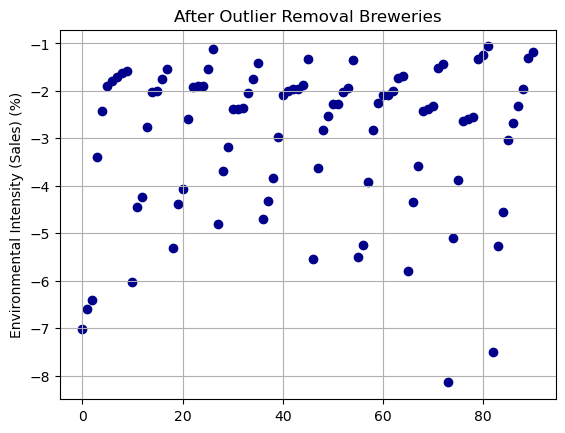

In [76]:
plt.scatter(range(len(brewery_df)), brewery_df["Environmental Intensity (Sales)"], color='darkblue')
plt.title("After Outlier Removal Breweries")
plt.ylabel("Environmental Intensity (Sales) (%)")
plt.grid(True)

# Show the plot
plt.show()

### Export Brewers

In [77]:
brewery_df.to_csv("Sales_no_outliers_brewery_only.csv")

In [78]:
# Group the data by "Company Name" and count unique years for each group
company_years_count = brewery_df.groupby("Company Name")["Year"].nunique()

# Filter companies with at least 10 years of data
filtered_companies = company_years_count[company_years_count >= 8].index

# Create a new DataFrame with only the companies that meet the criteria
filtered_df = brewery_df[brewery_df["Company Name"].isin(filtered_companies)]
#filtered_df.shape

In [79]:
filtered_df.describe()

,Year,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
count,70.00000,70.000000,70.000000,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,7.000000e+01,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,7.000000e+01
mean,2014.50000,-2.700345,-20.454914,-5.563805e+08,-2.160948e+08,-1.359297e+08,-1.357939e+08,-1.615633e+06,-1.615698e+06,-2.205750e+07,...,-140527.146413,-1367.525225,-170.547294,-61665.270426,-1629.993738,19185.360309,19167.956733,-20236.689958,0.041639,2.015234e+10
std,2.89302,1.215714,7.483182,4.944295e+08,2.029298e+08,1.222358e+08,1.220721e+08,1.528596e+06,1.528619e+06,1.975519e+07,...,114003.558157,1030.595112,80.227848,54080.879116,1228.396777,15100.755939,15098.402582,18864.169322,0.037091,1.059868e+10
min,2010.00000,-6.596233,-46.522794,-2.014783e+09,-8.152604e+08,-4.966729e+08,-4.960072e+08,-6.138997e+06,-6.139185e+06,-8.033947e+07,...,-403771.445248,-3914.291085,-340.074642,-220370.587233,-4665.559245,500.041855,500.041855,-75893.622336,0.006961,3.254400e+09
25%,2012.00000,-3.535391,-23.836357,-5.507975e+08,-2.169263e+08,-1.482272e+08,-1.480963e+08,-1.608663e+06,-1.608663e+06,-2.424368e+07,...,-189751.073506,-2127.488514,-234.302990,-71518.268872,-2535.816446,5208.278379,5208.278379,-20739.504315,0.010498,1.129416e+10
50%,2014.50000,-2.340697,-18.095641,-3.740234e+08,-1.521568e+08,-9.047785e+07,-9.042286e+07,-1.133053e+06,-1.133053e+06,-1.461197e+07,...,-150769.868084,-1304.463639,-140.119558,-40217.642561,-1554.828770,17761.303792,17698.605074,-14150.150363,0.023569,1.928265e+10
75%,2017.00000,-1.897813,-15.706768,-2.681731e+08,-1.021894e+08,-6.982442e+07,-6.978373e+07,-7.585218e+05,-7.587461e+05,-1.129298e+07,...,-36124.450205,-382.812300,-109.910728,-30818.126395,-456.285296,30795.636819,30795.636819,-9660.469889,0.076415,2.614523e+10
max,2019.00000,-1.121407,-10.508374,-1.163353e+08,-1.363524e+07,-1.664041e+07,-1.658215e+07,-1.033039e+05,-1.033039e+05,-2.802674e+06,...,-22823.399686,-71.728819,-67.059773,-7733.188929,-85.495700,56659.806086,56659.806086,-1611.055691,0.151424,5.248464e+10


We see no more outliers in the brewery category!

In [81]:
molson_df = brewery_df[brewery_df['Company Name'] == 'MOLSON COORS BEVERAGE CO']
molson_df.describe()

,Year,Environmental Intensity (Sales),Environmental Intensity (Op Inc),Total Environmental Cost,SDG 1.5,SDG 2.1,SDG 2.2,SDG 2.3,SDG 2.4,SDG 3.3,...,SDG 12.2,SDG 14.1,SDG 14.2,SDG 14.3,SDG 14.c,SDG 15.1,SDG 15.2,SDG 15.5,% Imputed,Revenue
count,10.00000,10.000000,10.000000,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,1.000000e+01,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01
mean,2014.50000,-4.120462,-33.029391,-2.652207e+08,-6.188890e+07,-4.034265e+07,-4.030515e+07,-4.623597e+05,-4.623597e+05,-6.567150e+06,...,-42679.025257,-647.695668,-179.911348,-18374.562832,-772.007611,8870.654480,8870.654480,-5820.024753,0.083268,5.984330e+09
std,3.02765,1.065710,6.227676,2.075479e+08,5.309139e+07,3.241491e+07,3.239504e+07,3.958148e+05,3.958148e+05,5.248231e+06,...,25350.998397,349.938136,106.856299,14183.079147,417.101608,4776.664129,4776.664129,4923.966316,0.032607,3.343503e+09
min,2010.00000,-6.596233,-46.522794,-6.978419e+08,-1.427968e+08,-8.998972e+07,-8.992088e+07,-1.065586e+06,-1.065586e+06,-1.460728e+07,...,-80676.306954,-1157.760264,-340.074642,-40119.876325,-1379.968681,4949.891252,4949.891252,-13339.829917,0.010385,3.254400e+09
25%,2012.25000,-4.431317,-35.947776,-4.004477e+08,-1.087709e+08,-6.883078e+07,-6.877702e+07,-8.118743e+05,-8.118743e+05,-1.117668e+07,...,-67133.468864,-1004.845180,-282.987549,-30708.383605,-1197.704671,5104.693953,5104.693953,-10163.706830,0.082150,3.654750e+09
50%,2014.50000,-3.899730,-32.816107,-1.491378e+08,-3.491917e+07,-2.263520e+07,-2.261545e+07,-2.610145e+05,-2.610145e+05,-3.682959e+06,...,-27111.080459,-457.791544,-114.281272,-11039.956214,-545.655273,6241.265972,6241.265972,-3267.658447,0.087889,4.176200e+09
75%,2016.75000,-3.678285,-29.063347,-1.378879e+08,-2.704104e+07,-1.813891e+07,-1.812078e+07,-2.025524e+05,-2.025524e+05,-2.959646e+06,...,-25538.150261,-374.424955,-107.650903,-8755.036019,-446.288171,13800.342782,13800.342782,-2535.842442,0.093216,9.155800e+09
max,2019.00000,-2.381480,-23.947160,-1.163353e+08,-1.363524e+07,-1.664041e+07,-1.658215e+07,-1.033039e+05,-1.033039e+05,-2.802674e+06,...,-22823.399686,-363.070308,-96.272976,-7733.188929,-432.754232,15784.235922,15784.235922,-1611.055691,0.140587,1.100280e+10
